In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


In [2]:
data= pd.read_csv("wine.csv")

In [3]:
data.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [5]:
data[data.duplicated()].shape

(0, 14)

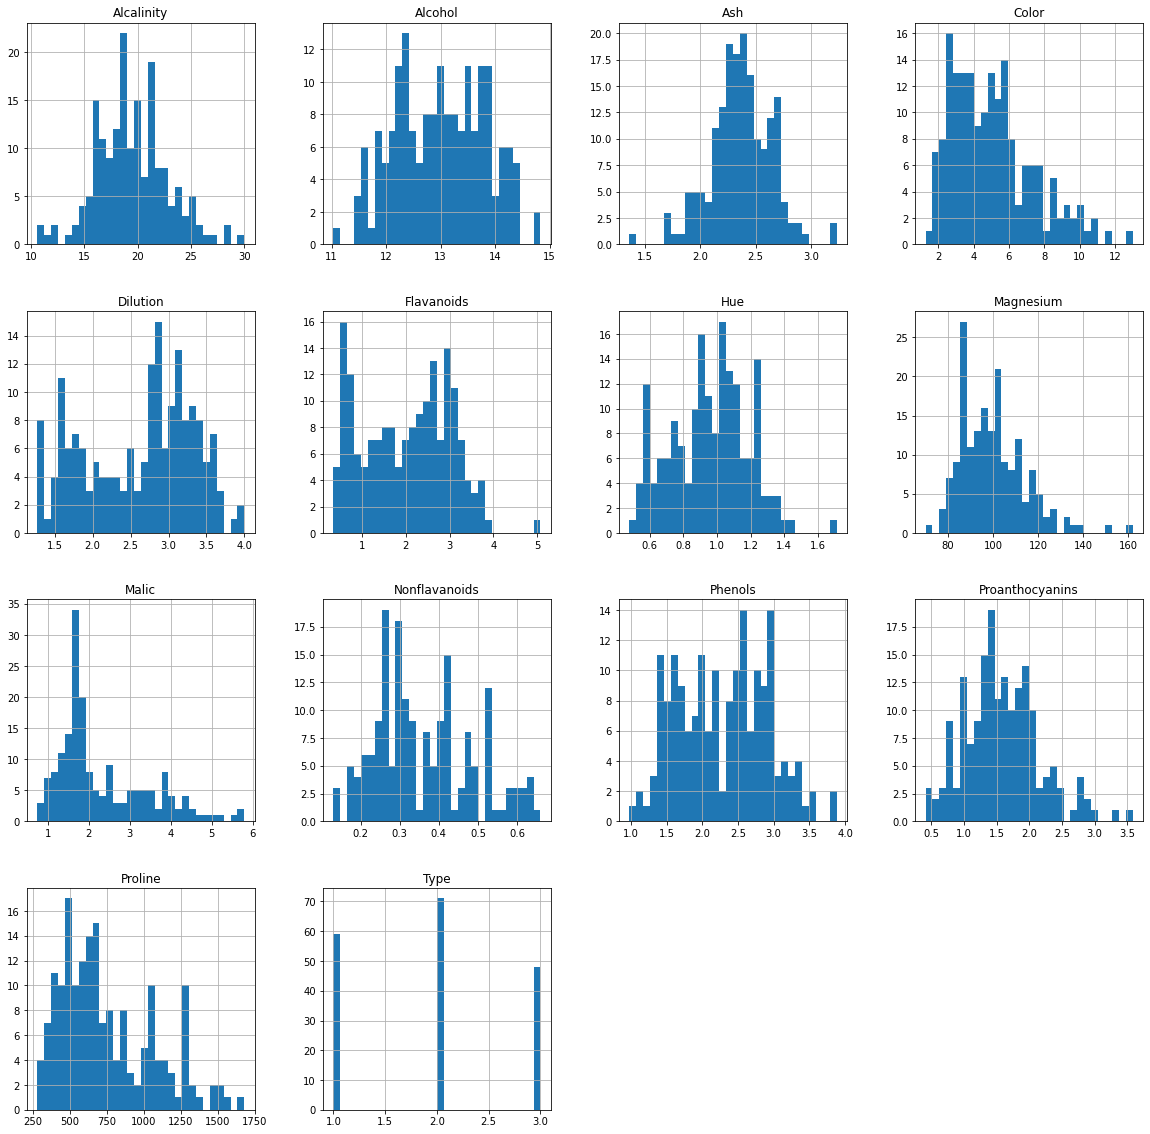

In [6]:
data.hist(bins=30, figsize=(20,20))
plt.show()

In [7]:
data_pca=np.array(data.iloc[:,1:].copy())

In [8]:
data_pca=scale(data_pca)

In [9]:
model_pca=PCA(n_components=3)
data_pca=model_pca.fit_transform(data_pca)

In [10]:
var=model_pca.explained_variance_ratio_
var.sum()

0.6652996889318525

In [11]:
var1=np.cumsum(np.round(var,decimals=4)*100)

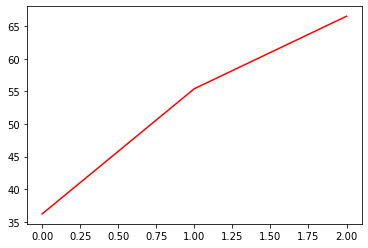

In [12]:
plt.plot(var1,color="red")

In [13]:
Final_pca=pd.concat([data[['Type']],pd.DataFrame(data_pca[:,0:],columns=['PC1','PC2','PC3'])  ],axis=1)

In [14]:
Final_pca

,Type,PC1,PC2,PC3
0,1,3.316751,-1.443463,-0.165739
1,1,2.209465,0.333393,-2.026457
2,1,2.516740,-1.031151,0.982819
3,1,3.757066,-2.756372,-0.176192
4,1,1.008908,-0.869831,2.026688
...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570
174,3,-2.601956,-1.757229,0.207581
175,3,-2.677839,-2.760899,-0.940942
176,3,-2.387017,-2.297347,-0.550696


# Kmeans Clustering

In [15]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [16]:
XK=Final_pca.iloc[:,1:]

In [17]:
scaler = StandardScaler()
k_pca=scaler.fit_transform(XK)

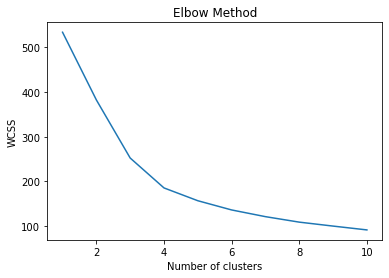

In [18]:
Wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,random_state=0)
    kmeans.fit(k_pca)
    Wcss.append(kmeans.inertia_)
plt.plot(range(1,11),Wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Optimum Number of cluster is 6 

In [19]:
cluster_new=KMeans(3,random_state=42)
A=cluster_new.fit(k_pca)

cluster1=pd.DataFrame(A.labels_, columns=['KMeans_PCA'])

In [20]:
A.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [21]:
Final_pca=pd.concat([Final_pca,cluster1],axis=1)

In [22]:
Final_pca.groupby(['KMeans_PCA']).count()

,Type,PC1,PC2,PC3
KMeans_PCA,,,,
0,64,64,64,64
1,52,52,52,52
2,62,62,62,62


In [23]:
Final_pca

,Type,PC1,PC2,PC3,KMeans_PCA
0,1,3.316751,-1.443463,-0.165739,2
1,1,2.209465,0.333393,-2.026457,2
2,1,2.516740,-1.031151,0.982819,2
3,1,3.757066,-2.756372,-0.176192,2
4,1,1.008908,-0.869831,2.026688,2
...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,1
174,3,-2.601956,-1.757229,0.207581,1
175,3,-2.677839,-2.760899,-0.940942,1
176,3,-2.387017,-2.297347,-0.550696,1


# Hirarchical clustering 

In [24]:

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [25]:
X=Final_pca.iloc[:,1:]

In [26]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [27]:
X=norm_func(X)

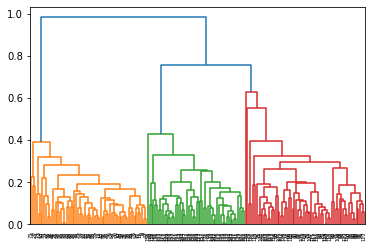

In [28]:
dendrogram= sch.dendrogram(sch.linkage(X,method='average'))

In [29]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='single')

In [30]:
HC_res=hc.fit_predict(X)
clusters=pd.DataFrame(HC_res,columns=['HC_PCA'])

In [31]:
Final_pca=pd.concat([Final_pca,clusters],axis=1)

In [32]:
Final_pca.iloc[:,4:]=Final_pca.iloc[:,4:]+1

In [33]:
Final_pca.groupby(['HC_PCA']).count()

,Type,PC1,PC2,PC3,KMeans_PCA
HC_PCA,,,,,
1,64,64,64,64,64
2,62,62,62,62,62
3,52,52,52,52,52


In [34]:
Final_pca

,Type,PC1,PC2,PC3,KMeans_PCA,HC_PCA
0,1,3.316751,-1.443463,-0.165739,3,2
1,1,2.209465,0.333393,-2.026457,3,2
2,1,2.516740,-1.031151,0.982819,3,2
3,1,3.757066,-2.756372,-0.176192,3,2
4,1,1.008908,-0.869831,2.026688,3,2
...,...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,2,3
174,3,-2.601956,-1.757229,0.207581,2,3
175,3,-2.677839,-2.760899,-0.940942,2,3
176,3,-2.387017,-2.297347,-0.550696,2,3


In [35]:
#cluster 2=1,1=2
#3=1,2=3,1=2

In [36]:
A=Final_pca[['HC_PCA']].copy()
B=A.copy()

In [37]:
A[B==1]=2
A[B==2]=1
Final_pca[['HC_PCA']]=A.copy()

In [38]:
C=Final_pca[['KMeans_PCA']].copy()
D=C.copy()

In [39]:
C[D==3]=1
C[D==2]=3
C[D==1]=2
Final_pca[['KMeans_PCA']]=C.copy()

In [40]:
Final_pca

,Type,PC1,PC2,PC3,KMeans_PCA,HC_PCA
0,1,3.316751,-1.443463,-0.165739,1,1
1,1,2.209465,0.333393,-2.026457,1,1
2,1,2.516740,-1.031151,0.982819,1,1
3,1,3.757066,-2.756372,-0.176192,1,1
4,1,1.008908,-0.869831,2.026688,1,1
...,...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,3,3
174,3,-2.601956,-1.757229,0.207581,3,3
175,3,-2.677839,-2.760899,-0.940942,3,3
176,3,-2.387017,-2.297347,-0.550696,3,3


# Hiararchical cluster Accuracy

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Final_pca['Type'],Final_pca['HC_PCA'])
print (confusion_matrix)

[[59  0  0]
 [ 3 64  4]
 [ 0  0 48]]


In [42]:
(confusion_matrix[0,0]+confusion_matrix[1,1]+confusion_matrix[2,2])/(confusion_matrix.sum())

0.9606741573033708

# K clustering Accuracy

In [43]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Final_pca['Type'],Final_pca['KMeans_PCA'])
print (confusion_matrix)

[[59  0  0]
 [ 3 64  4]
 [ 0  0 48]]


In [44]:
(confusion_matrix[0,0]+confusion_matrix[1,1]+confusion_matrix[2,2])/(confusion_matrix.sum())

0.9606741573033708

 kclustering and Hirarchical clustering are identical in nature and thus have same accuracy.

# KMeans clustering for original dataset 

In [45]:
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [46]:
scale=StandardScaler()

In [47]:
x=data.iloc[:,1:].copy()
y=data.iloc[:,0:1].copy()
norm_func(x)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


In [48]:
Scaled_hier=scale.fit_transform(x)
Scaled_hier

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [49]:
cluster_hier=KMeans(3,random_state=42)
X=cluster_hier.fit(Scaled_hier)
B=pd.DataFrame(X.labels_, columns=["KMeans_ORI"])
B=B+1


In [50]:
Final_pca=pd.concat([Final_pca,B],axis=1)

# Hirarchical clustering for original dataset 

In [51]:
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')

In [52]:
Y_hc=hc.fit_predict(norm_func(x))
cluster=pd.DataFrame(Y_hc,columns=['HC_ORI'])
cluster=cluster+1
#cluster.reset_index().groupby(['HC_ORI']).count()

In [53]:
Final_pca=pd.concat([Final_pca,cluster],axis=1)

In [54]:
Final_pca

,Type,PC1,PC2,PC3,KMeans_PCA,HC_PCA,KMeans_ORI,HC_ORI
0,1,3.316751,-1.443463,-0.165739,1,1,1,3
1,1,2.209465,0.333393,-2.026457,1,1,1,3
2,1,2.516740,-1.031151,0.982819,1,1,1,3
3,1,3.757066,-2.756372,-0.176192,1,1,1,3
4,1,1.008908,-0.869831,2.026688,1,1,1,1
...,...,...,...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,3,3,2,2
174,3,-2.601956,-1.757229,0.207581,3,3,2,2
175,3,-2.677839,-2.760899,-0.940942,3,3,2,2
176,3,-2.387017,-2.297347,-0.550696,3,3,2,2


In [55]:
A=Final_pca[['KMeans_ORI']].copy()
A[Final_pca['KMeans_ORI']==2]=3
A[Final_pca['KMeans_ORI']==3]=2
Final_pca[['KMeans_ORI']]=A.copy()

In [56]:
B=Final_pca[['HC_ORI']].copy()
B[Final_pca['HC_ORI']==3]=1
B[Final_pca['HC_ORI']==2]=3
B[Final_pca['HC_ORI']==1]=2
Final_pca[['HC_ORI']]=B.copy()

In [57]:
Final_pca

,Type,PC1,PC2,PC3,KMeans_PCA,HC_PCA,KMeans_ORI,HC_ORI
0,1,3.316751,-1.443463,-0.165739,1,1,1,1
1,1,2.209465,0.333393,-2.026457,1,1,1,1
2,1,2.516740,-1.031151,0.982819,1,1,1,1
3,1,3.757066,-2.756372,-0.176192,1,1,1,1
4,1,1.008908,-0.869831,2.026688,1,1,1,2
...,...,...,...,...,...,...,...,...
173,3,-3.370524,-2.216289,-0.342570,3,3,3,3
174,3,-2.601956,-1.757229,0.207581,3,3,3,3
175,3,-2.677839,-2.760899,-0.940942,3,3,3,3
176,3,-2.387017,-2.297347,-0.550696,3,3,3,3


# Accuracy of original data for KMeans model

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Final_pca['Type'],Final_pca['KMeans_ORI'])
print (confusion_matrix)

[[59  0  0]
 [ 3 65  3]
 [ 0  0 48]]


In [59]:
(confusion_matrix[0,0]+confusion_matrix[1,1]+confusion_matrix[2,2])/(confusion_matrix.sum())

0.9662921348314607

# Accuracy of original data for hirarchical model

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Final_pca['Type'],Final_pca['HC_ORI'])
print (confusion_matrix)

[[57  2  0]
 [ 0 69  2]
 [ 0  0 48]]


In [61]:
(confusion_matrix[0,0]+confusion_matrix[1,1]+confusion_matrix[2,2])/(confusion_matrix.sum())

0.9775280898876404

The orginal data based hirarchical and Kmeans model have slightly higher accuracy.